In [2]:
import pandas as pd

file_path = '..\data\crime\police_recorded_offences\\'
columns_to_include = ['geo', 'TIME_PERIOD', 'OBS_VALUE']

df_homicide = pd.read_csv(file_path+"homicide.csv", usecols=columns_to_include)
df_rape = pd.read_csv(file_path+"rape.csv", usecols=columns_to_include)
df_sexual_assault = pd.read_csv(file_path+"sexual_assault.csv", usecols=columns_to_include)
df_sexual_violence = pd.read_csv(file_path+"sexual_violence.csv", usecols=columns_to_include)
df_theft = pd.read_csv(file_path+"theft.csv", usecols=columns_to_include)

df_homicide.isnull().sum(), df_rape.isnull().sum(), df_sexual_assault.isnull().sum(), df_sexual_violence.isnull().sum(), df_theft.isnull().sum()

(geo            0
 TIME_PERIOD    0
 OBS_VALUE      0
 dtype: int64,
 geo            0
 TIME_PERIOD    0
 OBS_VALUE      0
 dtype: int64,
 geo            0
 TIME_PERIOD    0
 OBS_VALUE      0
 dtype: int64,
 geo            0
 TIME_PERIOD    0
 OBS_VALUE      0
 dtype: int64,
 geo            0
 TIME_PERIOD    0
 OBS_VALUE      0
 dtype: int64)

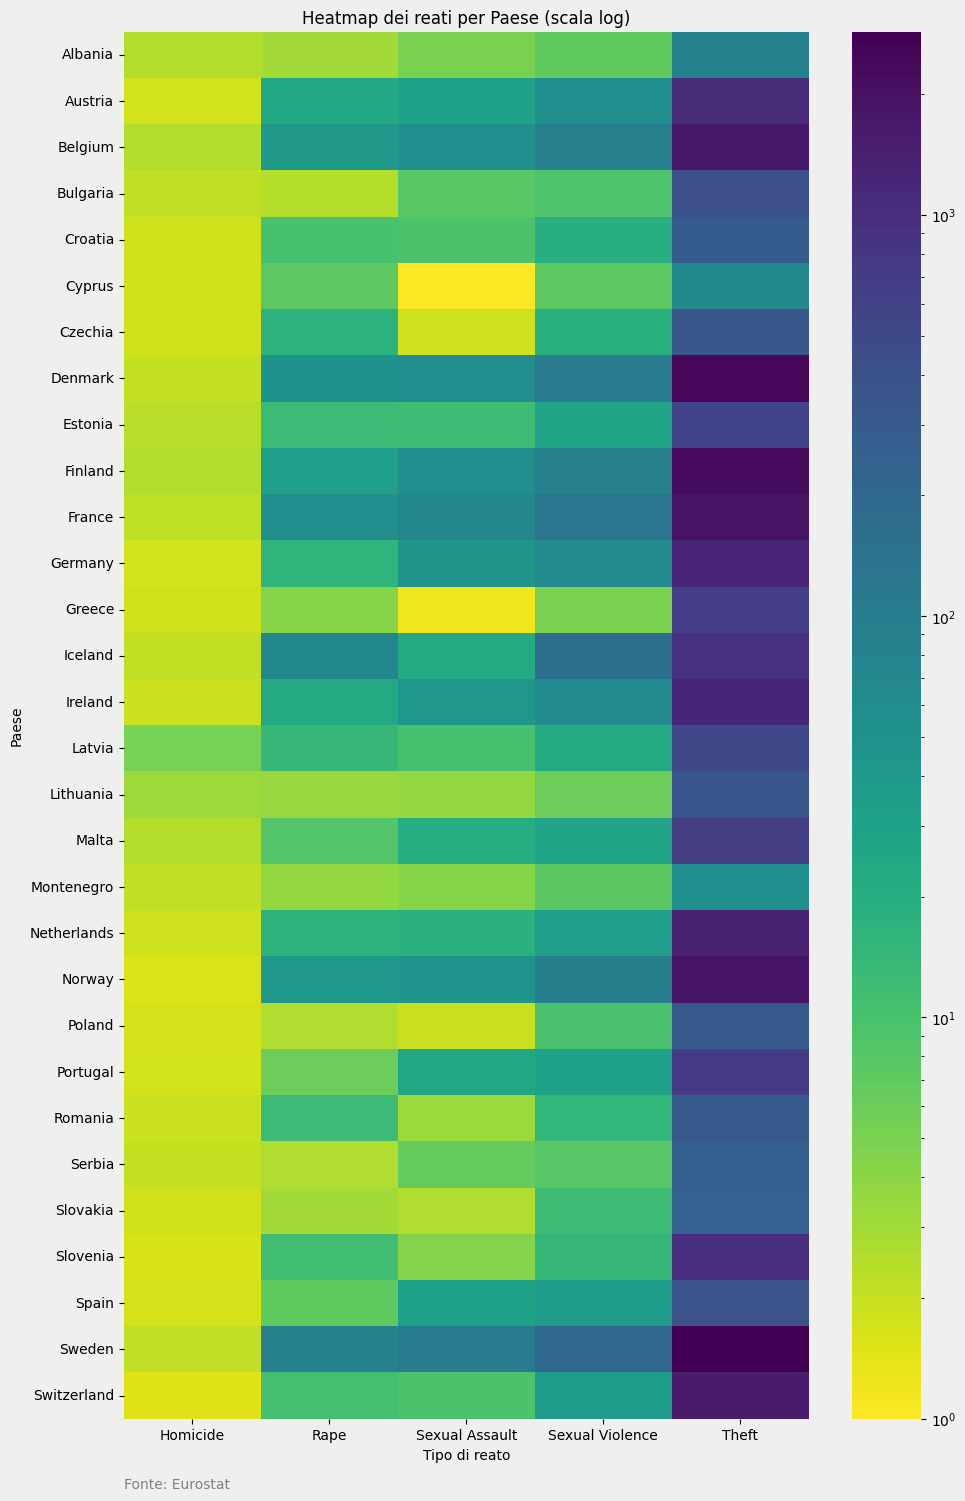

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

year = 2022
exclude = [""]

dfs = [
    (df_homicide, 'Homicide'),
    (df_rape, 'Rape'),
    (df_sexual_assault, 'Sexual Assault'),
    (df_sexual_violence, 'Sexual Violence'),
    (df_theft, 'Theft')
]

data = None
for df, crime_name in dfs:
    temp = df[df['TIME_PERIOD'] == year].dropna(subset=['OBS_VALUE'])
    temp = temp[['geo','OBS_VALUE']].rename(columns={'OBS_VALUE': crime_name})
    if data is None:
        data = temp
    else:
        data = pd.merge(data, temp, on='geo', how='outer')

# Rimuovi righe con valori NaN e imposta geo come indice
data = data.dropna().set_index('geo')

# Rimuovo i paesi da escludere
data = data[~data.index.isin(exclude)]

# Ordina i paesi per nome (alfabeticamente)
data = data.sort_index()

# Aggiungi un offset se ci sono valori pari a zero o molto bassi
offset = 1
data_log = data + offset

plt.figure(figsize=(10, 15))
sns.heatmap(data_log, cmap='viridis_r', norm=LogNorm(), cbar=True)

plt.title("Heatmap dei reati per Paese (scala log)")
plt.xlabel("Tipo di reato")
plt.ylabel("Paese")
plt.gcf().set_facecolor("#efefef")

plt.text(
    0, -0.05,  # Posizione
    "Fonte: Eurostat",
    fontsize=10,
    color='gray',
    ha='left',  # Allineamento orizzontale
    transform=plt.gca().transAxes  # Posiziona il testo in coordinate relative al grafico
)

plt.tight_layout()
plt.show()
